# Emotion Detection

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from sklearn.tree import DecisionTreeClassifier
import nltk
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation




import re
import nltk
import string
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

#nltk.download("stopwords")
from hazm import Normalizer, word_tokenize, stopwords_list, Lemmatizer



# stop_words = set(stopwords.words("english"))
# lemmatizer= WordNetLemmatizer()

# Modelling
from sklearn.model_selection import train_test_split,KFold, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
from sklearn.pipeline import Pipeline
from sklearn.metrics import f1_score
from sklearn.svm import SVC

#Lime
from lime import lime_text
from lime.lime_text import LimeTextExplainer
from lime.lime_text import IndexedString,IndexedCharacters
from lime.lime_base import LimeBase
from lime.lime_text import explanation

2025-08-01 14:24:45.050336: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
column_names = ['Text', 'Emotion']

train_data = pd.read_csv("train.tsv", delimiter='\t', header=None, names=column_names, quotechar='"')
test_data = pd.read_csv("test.tsv", delimiter='\t', header=None, names=column_names, quotechar='"')
# train_data.drop(0, inplace=True)

train_data

,Text,Emotion
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD
...,...,...
6120,مرحوم پیش بینی آبکی زیاد میکرد مرحوم عجب آ...,SURPRISE
6121,کلا عین اعتقادات و توئیت زدناتون ... !! در ق...,ANGRY
6122,خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...,FEAR
6123,همون هارو مگه آهنگ جدیدای خواننده‌های دهه ...,SURPRISE


In [3]:
print(train_data.shape)
print(test_data.shape)

(6125, 2)
(1151, 2)


In [4]:
train_data.info

<bound method DataFrame.info of                                                    Text   Emotion
0     خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...       SAD
1        از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم      HATE
2      "کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...       SAD
3     چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...     OTHER
4                 اين وضع ب طرز خنده داري گريه داره ...       SAD
...                                                 ...       ...
6120  مرحوم پیش بینی آبکی زیاد میکرد     مرحوم عجب آ...  SURPRISE
6121  کلا عین اعتقادات و توئیت زدناتون ... !!   در ق...     ANGRY
6122  خب وقتی میگی کسی بیاد مارو بگیره یارو ترس میکن...      FEAR
6123  همون هارو     مگه آهنگ جدیدای خواننده‌های دهه ...  SURPRISE
6124                            نیم دگیرش چطور حل نیشد      OTHER

[6125 rows x 2 columns]>

In [5]:
train_data.describe()

,Text,Emotion
count,6125,6125
unique,6081,7
top,وحشتناکه,OTHER
freq,4,1681


In [6]:
# Check the balance
train_data.Emotion.value_counts()

Emotion
OTHER       1681
ANGRY        923
SAD          896
FEAR         757
SURPRISE     739
HAPPY        618
HATE         511
Name: count, dtype: int64

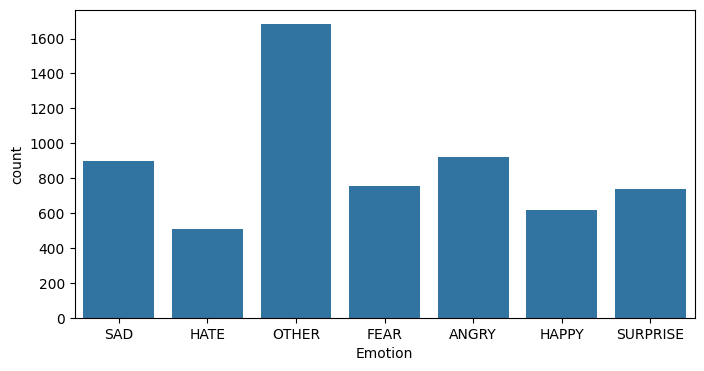

In [7]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=train_data);

In [8]:
# NULL values
print(train_data.isnull().sum())
print(train_data.duplicated().sum())

index = train_data[train_data.duplicated() == True].index
train_data.drop(index, axis = 0, inplace = True)
train_data.reset_index(inplace=True, drop = True)
print(train_data.shape)

Text       0
Emotion    0
dtype: int64
37
(6088, 2)


In [9]:
# print the rows which are duplicated (duplicated in the text but with different emotions)
train_data[train_data['Text'].duplicated() == True]

,Text,Emotion
2538,#NAME?,HATE
2689,#NAME?,SURPRISE
3251,#NAME?,HAPPY
4735,از دخترای باهوش نمیترسن! برعکس این خودشونن که ...,OTHER
5018,منم واقعا میترسم....هیچوقت فاز کسی که یه بستنی...,SURPRISE
5866,چه جالب,HAPPY
5892,اخ گفتی,SURPRISE


In [10]:
#removing duplicated text
index = train_data[train_data['Text'].duplicated() == True].index
train_data.drop(index, axis = 0, inplace = True)
train_data.reset_index(inplace=True, drop = True)

In [11]:
#Count the number of stopwords in the data
normalizer = Normalizer()
lemmatizer = Lemmatizer()
persian_stopwords = set(stopwords_list())

temp =train_data.copy()
temp['stop_words'] = temp['Text'].apply(
    lambda x: len(set(str(x).split()) & persian_stopwords)
)

print(temp['stop_words'].value_counts())

stop_words
1     743
0     626
2     618
3     522
4     503
5     433
7     366
6     362
8     300
9     281
10    255
11    217
12    200
13    189
14    125
15    105
16     81
17     56
18     44
19     23
20     12
21      6
22      4
24      3
23      3
25      2
87      1
40      1
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

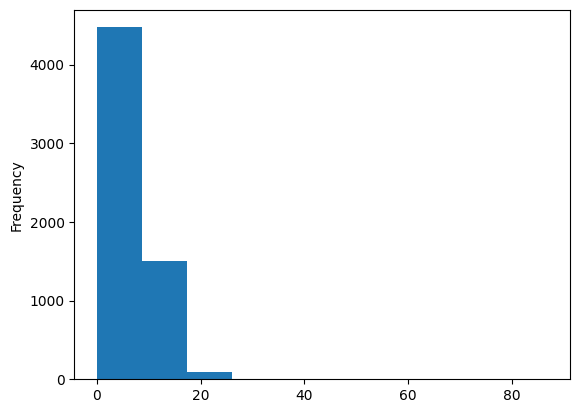

In [12]:
#distribution of stopwords visually
temp['stop_words'].plot(kind= 'hist')

In [13]:
#check if the data is balanced or not
test_data.Emotion.value_counts()

Emotion
HAPPY       275
SAD         262
OTHER       193
ANGRY       154
SURPRISE    145
HATE         65
FEAR         57
Name: count, dtype: int64

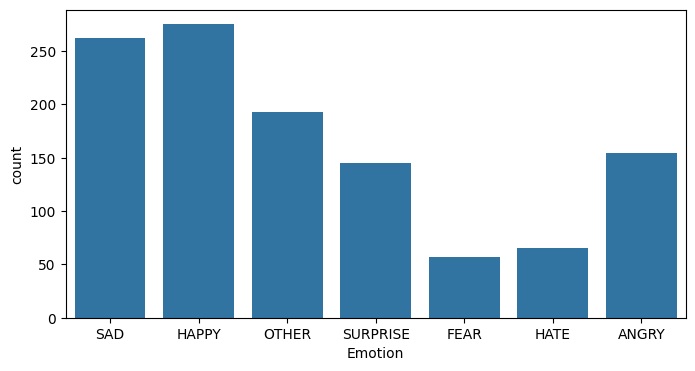

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=test_data);

In [15]:
#check if the data is balanced or not
test_data.Emotion.value_counts()

Emotion
HAPPY       275
SAD         262
OTHER       193
ANGRY       154
SURPRISE    145
HATE         65
FEAR         57
Name: count, dtype: int64

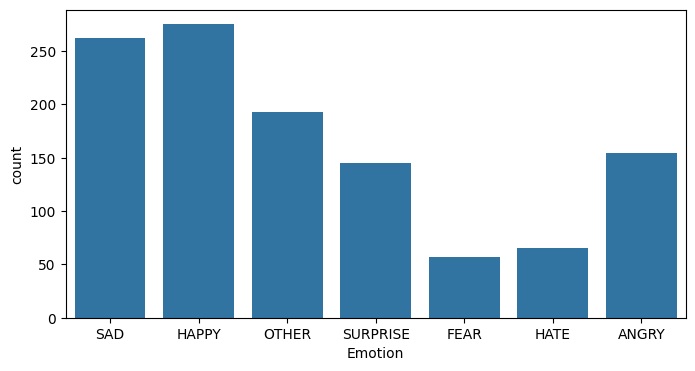

In [16]:
plt.figure(figsize=(8,4))
sns.countplot(x='Emotion', data=test_data);

In [17]:
#print the number of null values in each column
print(test_data.isnull().sum())
#print the number of duplicated values
print(test_data.duplicated().sum())

Text       0
Emotion    0
dtype: int64
0


In [18]:
#print the rows which are duplicated
test_data[test_data['Text'].duplicated() == True]

,Text,Emotion


In [19]:
temp =test_data.copy()
temp['stop_words'] = temp['Text'].apply(
    lambda x: len(set(str(x).split()) & persian_stopwords)
)

print(temp['stop_words'].value_counts())

stop_words
7     99
6     97
5     93
4     84
3     84
2     83
9     79
10    71
11    70
8     69
12    53
14    47
1     46
15    44
13    35
16    26
0     21
17    20
18    12
19     7
20     5
21     4
22     2
Name: count, dtype: int64


<Axes: ylabel='Frequency'>

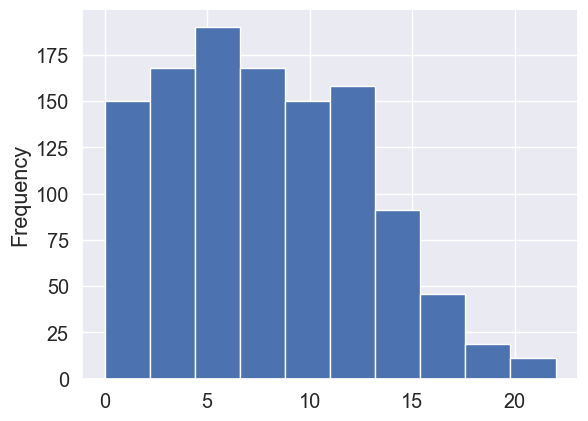

In [20]:
sns.set(font_scale=1.3)
temp['stop_words'].plot(kind= 'hist')

In [21]:
def dataframe_difference(df1, df2, which=None):
    """Find rows which are different between two DataFrames."""

    # Combine the two DataFrames using a merge operation, with the
    # indicator parameter set to True. This adds a column called _merge
    # to the resulting DataFrame, which indicates the source of each row.
    comparison_df = df1.merge(
        df2,
        indicator=True,
        how='outer'
    )

    # Filter the merged DataFrame based on the value of _merge. If which
    # is not specified, return all rows where _merge is not 'both'.
    # Otherwise, return all rows where _merge has the specified value
    if which is None:
        diff_df = comparison_df[comparison_df['_merge'] != 'both']
    else:
        diff_df = comparison_df[comparison_df['_merge'] == which]

    return diff_df

In [22]:
dataframe_difference(train_data, test_data, which='both')

,Text,Emotion,_merge
679,19628b15دوستان تو قسمت دوست به دوست کد من رو و...,OTHER,both
3423,در فلزی بسته به بدنه استوانه ای چسب نواری زده ...,SAD,both
3845,روحش شاد و یادش گرامی باد,SAD,both
5171,من دقیقا از سایت ایکیا چند روز پیش همین کار رو...,SURPRISE,both


## Cleaning

In [23]:
import re
import numpy as np
from hazm import Normalizer, WordTokenizer, Lemmatizer, stopwords_list

# Hazm tools
normalizer = Normalizer()
lemmatizer = Lemmatizer()
persian_stopwords = set(stopwords_list())



# ============================
# Preprocessing Functions
# ============================

def remove_stop_words(text):
    words = [i for i in str(text).split() if i not in persian_stopwords]
    return " ".join(words)

def remove_numbers(text):
    return ''.join([i for i in text if not i.isdigit()])

def to_lower_case(text):
    return " ".join([word.lower() for word in str(text).split()])

def remove_punctuations(text):
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛', '')
    text = re.sub('\s+', ' ', text)
    return text.strip()

def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def hazm_preprocess(text):
    text = normalizer.decrease_repeated_chars(text)
    text = normalizer.persian_number(text)
    text = normalizer.remove_diacritics(text)
    text = normalizer.correct_spacing(text)
    text = normalizer.normalize(text)
    return text

def hazm_lemmatize(text):
    return lemmatizer.lemmatize(text)

def normalized_sentence(sentence):
    sentence = str(sentence)
    sentence = to_lower_case(sentence)
    sentence = hazm_preprocess(sentence)
    sentence = remove_urls(sentence)
    sentence = remove_punctuations(sentence)
    sentence = remove_numbers(sentence)
    sentence = remove_stop_words(sentence)
    sentence = hazm_lemmatize(sentence)
    return sentence

# ============================
# Main Preprocessing Pipeline
# ============================

def normalize_text(df):
    df['Text'] = df['Text'].astype(str)
    df['Text'] = df['Text'].apply(to_lower_case)
    df['Text'] = df['Text'].apply(hazm_preprocess)
    df['Text'] = df['Text'].apply(remove_urls)
    df['Text'] = df['Text'].apply(remove_punctuations)
    df['Text'] = df['Text'].apply(remove_numbers)
    df['Text'] = df['Text'].apply(remove_stop_words)
    df['Text'] = df['Text'].apply(hazm_lemmatize)

    return df

def remove_small_sentences(df):
    df['Text'] = df['Text'].apply(lambda x: np.nan if len(str(x).split()) < 3 else x)



In [24]:
train_data= normalize_text(train_data)
test_data= normalize_text(test_data)

/var/folders/vs/t6hclhb524l53jbbc2n222640000gn/T/ipykernel_4946/2198372672.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Emotion', order=df['Emotion'].value_counts().index, palette='viridis')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


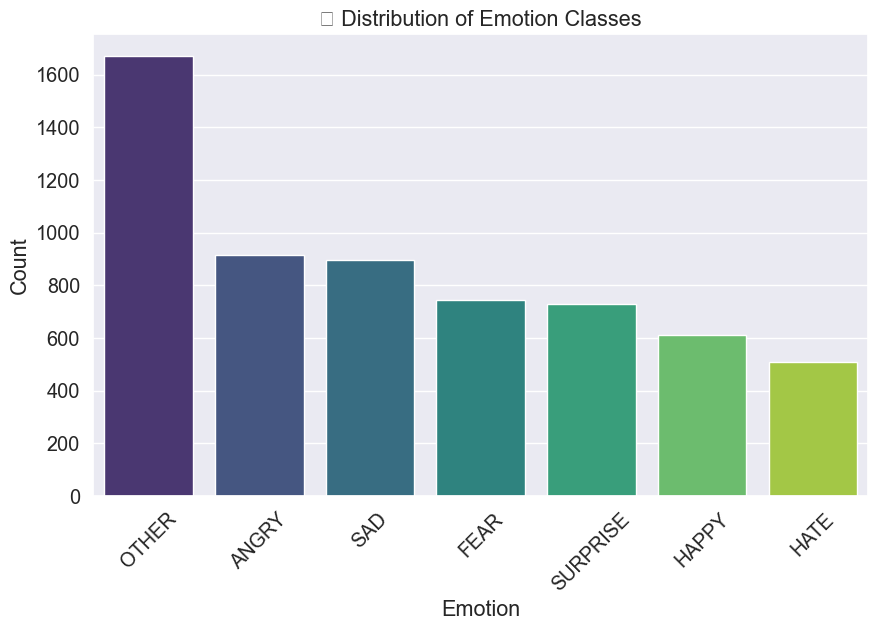

In [25]:
df = train_data  # or change to the correct DataFrame name if different

# 1. Label distribution
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Emotion', order=df['Emotion'].value_counts().index, palette='viridis')
plt.title('🔍 Distribution of Emotion Classes')
plt.xlabel('Emotion')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [26]:
# 2. Preprocess text for token analysis
normalizer = Normalizer()
tokenizer = WordTokenizer()

def preprocess(text):
    text = normalizer.normalize(str(text))
    tokens = tokenizer.tokenize(text)
    return tokens

df['tokens'] = df['Text'].apply(preprocess)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128207 (\N{STRAIGHT RULER}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


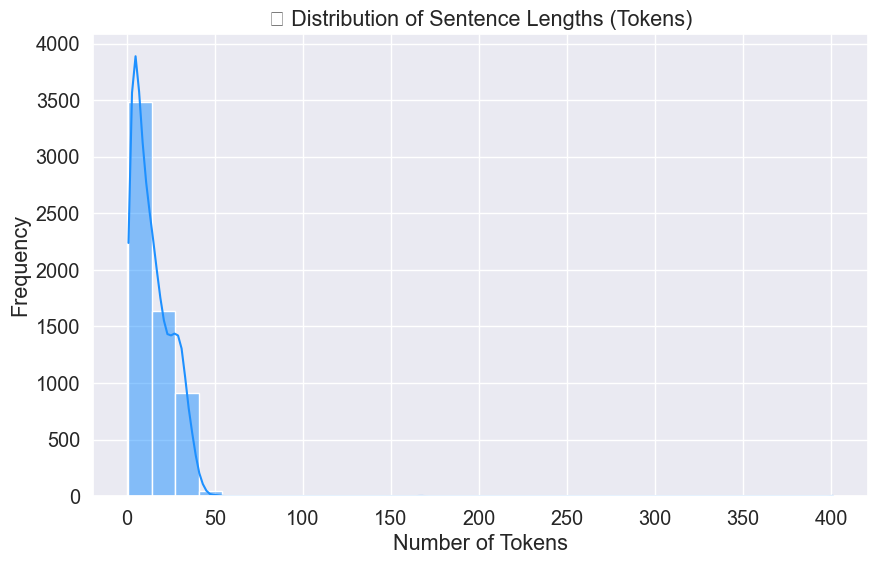

In [27]:
# 3. Sentence lengths
df['text_length'] = df['tokens'].apply(len)

plt.figure(figsize=(10,6))
sns.histplot(df['text_length'], bins=30, kde=True, color='dodgerblue')
plt.title('📏 Distribution of Sentence Lengths (Tokens)')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.show()


/var/folders/vs/t6hclhb524l53jbbc2n222640000gn/T/ipykernel_4946/4280974409.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(freqs), y=list(words), palette='rocket')
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128292 (\N{INPUT SYMBOL FOR LATIN LETTERS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


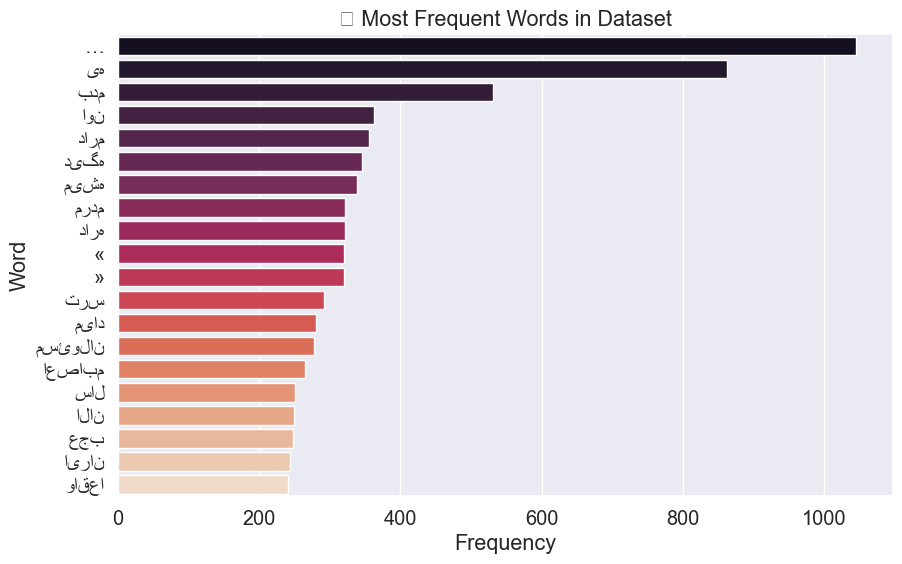

In [28]:
# 4. Most common words across all texts
from collections import Counter
all_tokens = [token for tokens in df['tokens'] for token in tokens]
most_common = Counter(all_tokens).most_common(20)

words, freqs = zip(*most_common)
plt.figure(figsize=(10,6))
sns.barplot(x=list(freqs), y=list(words), palette='rocket')
plt.title('🔤 Most Frequent Words in Dataset')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()


## Modeling

In [29]:
X_train = train_data['Text'].values
y_train = train_data['Emotion'].values

X_test = test_data['Text'].values
y_test = test_data['Emotion'].values

In [30]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

In [31]:
# Encode labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)
y_val_encoded = le.transform(y_val)
y_test_encoded = le.transform(y_test)

In [32]:
# Vectorize training data first
from imblearn.over_sampling import SMOTE
tfidf = TfidfVectorizer(ngram_range=(1,2), max_df=0.9, min_df=5, max_features=5000)
X_train_tfidf = tfidf.fit_transform(X_train)

# Apply SMOTE on vectorized data
sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_tfidf, y_train_encoded)

In [33]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
def train_model(model, data, targets):
    """
    Train a model on the given data and targets.

    Parameters:
    model (sklearn model): The model to be trained.
    data (list of str): The input data.
    targets (list of str): The targets.

    Returns:
    Pipeline: The trained model as a Pipeline object.
    """
    # Create a Pipeline object with a TfidfVectorizer and the given model
    text_clf = Pipeline([
        ('clf', model)
    ])
    text_clf.fit(data, targets)
    return text_clf

In [34]:
from sklearn.metrics import f1_score
def get_F1(true,pred):
    """
    Get the F1 score for the given model on the given data and targets.

    Parameters:
    trained_model (sklearn model): The trained model.
    X (list of str): The input data.
    y (list of str): The targets.

    Returns:
    array: The F1 score for each class.
    """
    # Calculate the F1 score for the predictions
    return f1_score(true, pred, average='weighted')

In [35]:
log_reg = train_model(
    LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced', random_state=0),
    X_train_resampled,
    y_train_resampled
)

X_test_tfidf = tfidf.transform(X_test)


In [36]:
#test the model with the test data
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report
y_pred_lr = log_reg.predict(X_test_tfidf)

#calculate the accuracy
log_reg_accuracy = accuracy_score(y_test_encoded, y_pred_lr)
print('Accuracy: ', log_reg_accuracy,'\n')

#calculate the F1 score
f1_lr = get_F1(y_test_encoded, y_pred_lr)
pd.DataFrame(f1_lr, index=le.classes_, columns=['F1 score'])

Accuracy:  0.4474370112945265 



,F1 score
ANGRY,0.440464
FEAR,0.440464
HAPPY,0.440464
HATE,0.440464
OTHER,0.440464
SAD,0.440464
SURPRISE,0.440464


In [37]:
print(classification_report(y_test_encoded, y_pred_lr, target_names=le.classes_))

              precision    recall  f1-score   support

       ANGRY       0.45      0.31      0.36       154
        FEAR       0.62      0.67      0.64        57
       HAPPY       0.59      0.37      0.45       275
        HATE       0.22      0.11      0.14        65
       OTHER       0.30      0.66      0.41       193
         SAD       0.53      0.60      0.56       262
    SURPRISE       0.59      0.27      0.37       145

    accuracy                           0.45      1151
   macro avg       0.47      0.42      0.42      1151
weighted avg       0.49      0.45      0.44      1151



In [38]:
#Train the model with the training data
X_train_tfidf_orig = tfidf.transform(X_train)
DT = train_model(DecisionTreeClassifier(random_state=0), X_train_tfidf_orig, y_train_encoded)
#test the model with the test data
y_pred_dt = DT.predict(X_test_tfidf)

#calculate the accuracy
DT_accuracy =accuracy_score(y_test_encoded, y_pred_dt)
print('Accuracy: ', DT_accuracy,'\n')

#calculate the F1 score
f1_dt = get_F1(y_test_encoded, y_pred_dt)
pd.DataFrame(f1_dt, index=le.classes_, columns=['F1 score'])

Accuracy:  0.3631624674196351 



,F1 score
ANGRY,0.356005
FEAR,0.356005
HAPPY,0.356005
HATE,0.356005
OTHER,0.356005
SAD,0.356005
SURPRISE,0.356005


In [39]:
##Classification Report
print(classification_report(y_test_encoded, y_pred_dt, target_names=le.classes_))

              precision    recall  f1-score   support

       ANGRY       0.35      0.31      0.33       154
        FEAR       0.50      0.63      0.56        57
       HAPPY       0.48      0.21      0.30       275
        HATE       0.26      0.17      0.21        65
       OTHER       0.26      0.59      0.36       193
         SAD       0.43      0.43      0.43       262
    SURPRISE       0.51      0.27      0.35       145

    accuracy                           0.36      1151
   macro avg       0.40      0.37      0.36      1151
weighted avg       0.41      0.36      0.36      1151



In [40]:
#Train the model with the training data
SVM = train_model(SVC(C=1.0, kernel='linear', probability=True,class_weight='balanced'), X_train_tfidf, y_train_encoded)

#test the model with the test data
y_pred_svm = SVM.predict(X_test_tfidf)

#calculate the accuracy
SVM_accuracy = accuracy_score(y_test_encoded, y_pred_svm)
print('Accuracy: ', SVM_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(y_test_encoded, y_pred_svm)
pd.DataFrame(f1_Score, index=le.classes_, columns=['F1 score'])

Accuracy:  0.45004344048653344 



,F1 score
ANGRY,0.444468
FEAR,0.444468
HAPPY,0.444468
HATE,0.444468
OTHER,0.444468
SAD,0.444468
SURPRISE,0.444468


In [41]:
##Classification Report
print(classification_report(y_test_encoded, y_pred_svm, target_names=le.classes_))

              precision    recall  f1-score   support

       ANGRY       0.48      0.39      0.43       154
        FEAR       0.69      0.61      0.65        57
       HAPPY       0.62      0.39      0.48       275
        HATE       0.19      0.09      0.12        65
       OTHER       0.30      0.65      0.41       193
         SAD       0.50      0.58      0.54       262
    SURPRISE       0.60      0.23      0.34       145

    accuracy                           0.45      1151
   macro avg       0.48      0.42      0.42      1151
weighted avg       0.50      0.45      0.44      1151



In [42]:
#Train the model with the training data
RF =train_model(RandomForestClassifier(n_estimators=200, max_depth=50, class_weight='balanced'), X_train_tfidf, y_train_encoded)

#test the model with the test data
y_pred_rf = RF.predict(X_test_tfidf)

#calculate the accuracy
RF_accuracy = accuracy_score(y_test_encoded, y_pred_rf)
print('Accuracy: ', RF_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(y_test_encoded, y_pred_rf)
pd.DataFrame(f1_Score, index=le.classes_, columns=['F1 score'])

Accuracy:  0.38575152041702865 



,F1 score
ANGRY,0.378162
FEAR,0.378162
HAPPY,0.378162
HATE,0.378162
OTHER,0.378162
SAD,0.378162
SURPRISE,0.378162


In [43]:
##Classification Report
print(classification_report(y_test_encoded, y_pred_rf, target_names=le.classes_))

              precision    recall  f1-score   support

       ANGRY       0.47      0.25      0.33       154
        FEAR       0.64      0.67      0.66        57
       HAPPY       0.50      0.22      0.30       275
        HATE       0.26      0.14      0.18        65
       OTHER       0.25      0.78      0.38       193
         SAD       0.57      0.42      0.49       262
    SURPRISE       0.62      0.25      0.35       145

    accuracy                           0.39      1151
   macro avg       0.47      0.39      0.38      1151
weighted avg       0.48      0.39      0.38      1151



In [44]:
import xgboost as xgb
# =(RandomForestClassifier(n_estimators=200, max_depth=50, class_weight='balanced'), X_train_tfidf, y_train_encoded)

XGB = train_model(xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=0),X_train_resampled, y_train_resampled)
# xgb_clf.fit()
y_pred_XGB = XGB.predict(X_test_tfidf)
XGB_accuracy = accuracy_score(y_test_encoded, y_pred_XGB)
print('Accuracy: ', XGB_accuracy,'\n')

#calculate the F1 score
f1_Score = get_F1(y_test_encoded, y_pred_XGB)
pd.DataFrame(f1_Score, index=le.classes_, columns=['F1 score'])

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/xgboost/training.py:183: UserWarning: [14:25:56] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Accuracy:  0.46481320590790615 



,F1 score
ANGRY,0.464142
FEAR,0.464142
HAPPY,0.464142
HATE,0.464142
OTHER,0.464142
SAD,0.464142
SURPRISE,0.464142


In [45]:
##Classification Report
print(classification_report(y_test_encoded, y_pred_XGB, target_names=le.classes_))

              precision    recall  f1-score   support

       ANGRY       0.51      0.37      0.43       154
        FEAR       0.61      0.72      0.66        57
       HAPPY       0.63      0.40      0.49       275
        HATE       0.34      0.28      0.31        65
       OTHER       0.32      0.68      0.43       193
         SAD       0.53      0.52      0.52       262
    SURPRISE       0.56      0.30      0.39       145

    accuracy                           0.46      1151
   macro avg       0.50      0.47      0.46      1151
weighted avg       0.51      0.46      0.46      1151



In [46]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Support Vector Machine', 'Random Forest', 'XGBoost'],
    'Accuracy': [
        round(log_reg_accuracy, 2),
        round(DT_accuracy, 2),
        round(SVM_accuracy, 2),
        round(RF_accuracy, 2),
        round(XGB_accuracy, 2)
    ],    'F1 Score (Weighted)': [
        round(get_F1(y_test_encoded, y_pred_lr), 2),
        round(get_F1(y_test_encoded, y_pred_dt), 2),
        round(get_F1(y_test_encoded, y_pred_svm), 2),
        round(get_F1(y_test_encoded, y_pred_rf), 2),
        round(get_F1(y_test_encoded, y_pred_XGB), 2)
    ]
})
models_sorted = models.sort_values(by='Accuracy', ascending=False).reset_index(drop=True)
models_sorted


,Model,Accuracy,F1 Score (Weighted)
0,XGBoost,0.46,0.46
1,Logistic Regression,0.45,0.44
2,Support Vector Machine,0.45,0.44
3,Random Forest,0.39,0.38
4,Decision Tree,0.36,0.36


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],  # for LogisticRegression or SVM
    'max_iter': [1000, 2000],
    'solver': ['liblinear', 'saga'],
}

grid = GridSearchCV(LogisticRegression(class_weight='balanced', random_state=0), param_grid, cv=5, scoring='f1_weighted')
grid.fit(X_train_resampled, y_train_resampled)

print("Best params:", grid.best_params_)
print("Best CV score:", grid.best_score_)


Best params: {'C': 100, 'max_iter': 1000, 'solver': 'saga'}
Best CV score: 0.810218350076868


In [48]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'max_iter': [1000, 2000],
    'solver': ['liblinear', 'saga'],
}

grid = GridSearchCV(
    LogisticRegression(class_weight='balanced', random_state=0),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_resampled, y_train_resampled)

print("Best parameters:", grid.best_params_)
print("Best cross-validated accuracy:", grid.best_score_)


Best parameters: {'C': 100, 'max_iter': 1000, 'solver': 'saga'}
Best cross-validated accuracy: 0.8194069915999052


In [49]:
best_model_name = models_sorted.loc[0, 'Model']  # gets model with highest accuracy
print("Best model is:", best_model_name)

Best model is: XGBoost


## LIME

In [50]:
#c_LR = make_pipeline(tfidf, clf)
from sklearn.pipeline import make_pipeline
idx  = 2
RF_pipeline = make_pipeline(tfidf, SVM.named_steps['clf'])
pred_label = le.inverse_transform(RF_pipeline.predict([X_test[idx]]))[0]
actual_label = y_test[idx]  # already a string

explainer_LR = LimeTextExplainer(class_names=le.classes_)
print("Actual Text : ", X_test[idx])
print("Prediction : ", pred_label)
print("Actual     : ", actual_label)

exp = explainer_LR.explain_instance(X_test[idx], RF_pipeline.predict_proba, top_labels=5)
exp.show_in_notebook()


Actual Text :  کدوم شعبه پول نداده بگو الان برات آمار دقیق بدم شعار الکی نده هرکی برداشت پولشو کمتر ساعت برگردوند فهمید کلاه سرش رفته بانکی آینده بهش خدمات میده سود
Prediction :  SAD
Actual     :  OTHER


In [51]:
#Splitting the text from the labels
X_train = train_data['Text']
y_train = train_data['Emotion']

X_test = test_data['Text']
y_test = test_data['Emotion']

In [52]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train,
    test_size=0.2,
    stratify=y_train,
    random_state=42
)

In [53]:
# Encode labels
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)
y_val = le.transform(y_val)
print(set(y_train))

{0, 1, 2, 3, 4, 5, 6}


In [54]:
#Convert the class vector (integers) to binary class matrix
from tensorflow.keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print(y_train)

[[0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]


## Tokenizing

In [55]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='UNK')
tokenizer.fit_on_texts(pd.concat([X_train, X_test], axis=0))

tokenizer.document_count

6015

In [56]:
#converting a single sentence to list of indexes
tokenizer.texts_to_sequences([X_train.iloc[0]])

#convert the list of indexes into a matrix of ones and zeros (BOW)
tokenizer.texts_to_matrix(X_train[0].split())

#the sentence contains three words and the size of the vocabulary is 14325
tokenizer.texts_to_matrix(X_train[0].split()).shape

sequences_train = tokenizer.texts_to_sequences(X_train)
sequences_test = tokenizer.texts_to_sequences(X_test)
sequences_val = tokenizer.texts_to_sequences(X_val)

## Padding

In [57]:
test_data.shape

(1151, 2)

In [58]:
maxlen = max([len(t) for t in train_data['Text']])
maxlen

2312

In [59]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
maxlen = max(len(seq) for seq in sequences_train)

X_train = pad_sequences(sequences_train, maxlen=maxlen, truncating='pre')
X_test = pad_sequences(sequences_test, maxlen=maxlen, truncating='pre')
X_val = pad_sequences(sequences_val, maxlen=maxlen, truncating='pre')

vocabSize = len(tokenizer.index_word) + 1
print(f"Vocabulary size = {vocabSize}")

Vocabulary size = 22837


In [60]:
#before
sequences_train[0]

[1933,
 157,
 43,
 8727,
 8728,
 201,
 8729,
 424,
 972,
 250,
 2909,
 138,
 1361,
 2515,
 587,
 1707,
 731,
 2910,
 5680,
 138,
 250,
 14,
 327,
 817,
 262,
 2,
 424,
 588,
 424,
 1934,
 908,
 424,
 1708,
 8730]

In [61]:
#after
X_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

## Word Embedding

In [62]:
# Read GloVE embeddings

path_to_glove_file = '/Users/macbookpro/Downloads/glove.6B.200d.txt'
num_tokens = vocabSize
embedding_dim = 200 #latent factors or features
hits = 0
misses = 0
embeddings_index = {}

In [63]:
# Read word vectors
with open(path_to_glove_file) as f:
    for line in f:
        word, coefs = line.split(maxsplit=1)
        coefs = np.fromstring(coefs, "f", sep=" ")
        embeddings_index[word] = coefs
print("Found %s word vectors." % len(embeddings_index))

# Assign word vectors to our dictionary/vocabulary
embedding_matrix = np.zeros((num_tokens, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # Words not found in embedding index will be all-zeros.
        # This includes the representation for "padding" and "OOV"
        embedding_matrix[i] = embedding_vector
        hits += 1
    else:
        misses += 1
print("Converted %d words (%d misses)" % (hits, misses))

Found 400000 word vectors.
Converted 274 words (22562 misses)


In [64]:
# Build neural network architecture
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding, Bidirectional

adam = Adam(learning_rate=0.005)

model = Sequential()
model.add(Embedding(vocabSize, 200, input_length=X_train.shape[1], weights=[embedding_matrix], trainable=False))
model.add(Bidirectional(LSTM(256, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2, return_sequences=True)))
model.add(Bidirectional(LSTM(128, dropout=0.2,recurrent_dropout=0.2)))
model.add(Dense(7, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
model.summary()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     4,567,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_2 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,567,400 (17.42 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 4,567,400 (17.42 MB)

Python(5170) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.
Python(5172) MallocStackLogging: can't turn off malloc stack logging because it was not enabled.


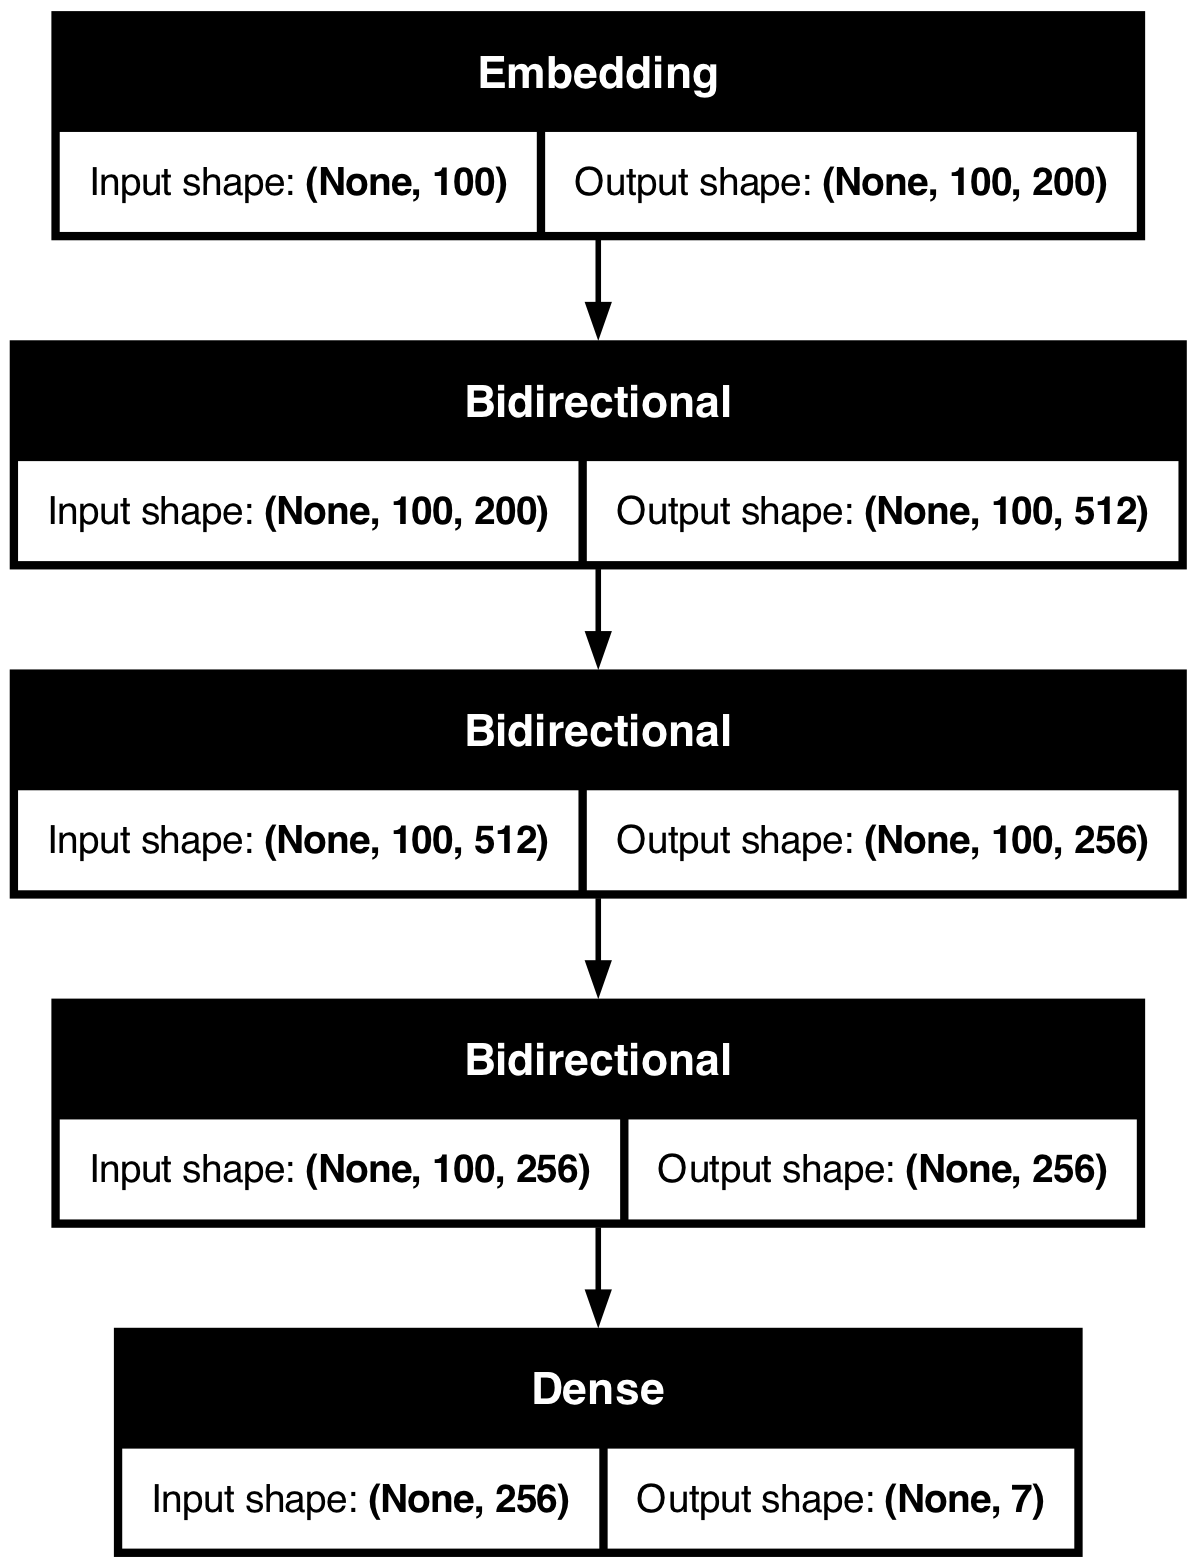

In [65]:
import tensorflow as tf
model.build(input_shape=(None, 100))
tf.keras.utils.plot_model(model, show_shapes=True)

In [66]:
#to stop the training when the loss starts to increase
callback = EarlyStopping(
    monitor="val_loss",
    patience=4,
    restore_best_weights=True,
)

In [67]:
# test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)
# print(f"\nTest Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

In [68]:
# # Evaluate on validation set
# val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=1)
# print(f"\nValidation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

In [69]:
# predicted = model.predict(X_test)
# y_pred = predicted.argmax(axis=-1)
# print("\nClassification Report:")
# print(classification_report(le.transform(test_data['Emotion']), y_pred, target_names=le.classes_))


In [70]:
# # Fit model
# history = model.fit(X_train,
#                     y_train,
#                     validation_data=(X_val, y_val),
#                     verbose=1,
#                     batch_size=256,
#                     epochs=30,
#                     callbacks=[callback]
#                    )

In [71]:
# #print the overall loss and accuracy
# model.evaluate(X_val, y_val, verbose=1)

In [72]:
# #print the overall loss and accuracy
# model.evaluate(X_test, y_test, verbose=1)

In [73]:
# predicted = model.predict(X_test)
# y_pred = predicted.argmax(axis=-1)

# print(classification_report(le.transform(test_data['Emotion']), y_pred))

In [74]:
# # Visualize Loss & Accuracy

# %matplotlib inline
# import matplotlib.pyplot as plt
# acc = history.history['accuracy']
# val_acc = history.history['val_accuracy']
# loss = history.history['loss']
# val_loss = history.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend()
# plt.figure()

# plt.plot(epochs, loss, 'r', label='Training Loss')
# plt.plot(epochs, val_loss, 'b', label='Validation Loss')
# plt.title('Training and validation loss')
# plt.legend()

# plt.show()

In [75]:
# Classify custom sample

sentences = [
            "مرگ پایان زندگی من است",
            'شاید مرگ پایان روح ما نباشه ولی پایان جسم ماست',
            "مرگ به پایان زندگی محدود نمیشه",
            "اه تف به این زندگی"
            ]
for sentence in sentences:
    print(sentence)
    sentence = normalized_sentence(sentence)
    sentence = tokenizer.texts_to_sequences([sentence])
    sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
    result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
    proba =  np.max(model.predict(sentence))
    print(f"{result} : {proba}\n\n")

مرگ پایان زندگی من است
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 664ms/step
ANGRY : 0.1428571492433548


شاید مرگ پایان روح ما نباشه ولی پایان جسم ماست
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 580ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
ANGRY : 0.1428571492433548


مرگ به پایان زندگی محدود نمیشه
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 630ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 421ms/step
ANGRY : 0.1428571492433548


اه تف به این زندگی
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 540ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step
ANGRY : 0.1428571492433548




In [76]:
sentence= 'شاید مرگ پایان روح ما نباشه ولی پایان جسم ماست'
print(sentence)
sentence = normalized_sentence(sentence)
sentence = tokenizer.texts_to_sequences([sentence])
sentence = pad_sequences(sentence, maxlen=229, truncating='pre')
result = le.inverse_transform(np.argmax(model.predict(sentence), axis=-1))[0]
proba =  np.max(model.predict(sentence))
print(f"{result} : {proba}\n\n")

شاید مرگ پایان روح ما نباشه ولی پایان جسم ماست
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 533ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 720ms/step
ANGRY : 0.1428571492433548




# OLD section

In [10]:
import hazm
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [11]:
# train_url = "train_data.csv"
test_url = "test.tsv"

# # Load the datasets
train_df = pd.read_csv("train.tsv", sep='\t', header=None)
test_df = pd.read_csv(test_url, sep='\t', header=None)

# train_df.drop(0,inplace=True)
train_df.columns = ['text', 'label']
test_df.columns = ['text', 'label']

## EDA

In [12]:
train_df.head()

,text,label
0,خیلی کوچیک هستن و سایزشون بدرد نمیخوره میخوام ...,SAD
1,از صدای پرنده دم دمای صبح متنفرم متنفرم متنفرم,HATE
2,"""کیفیتش خیلی خوبه با شک خریدم ولی واقعا راضیم...",SAD
3,چون همش با دوربین ثبت شده ، ایا میشه اعتراض زد...,OTHER
4,اين وضع ب طرز خنده داري گريه داره ...,SAD


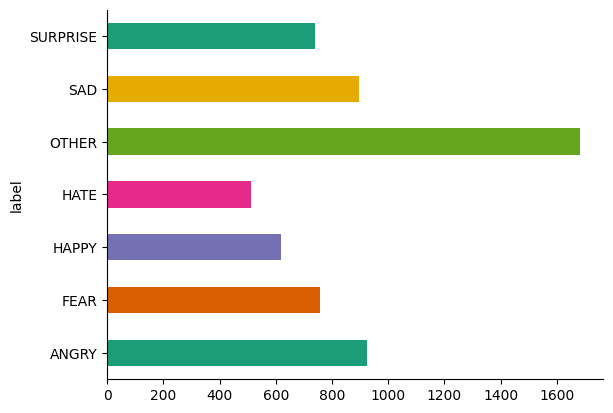

In [13]:
train_df.groupby('label').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

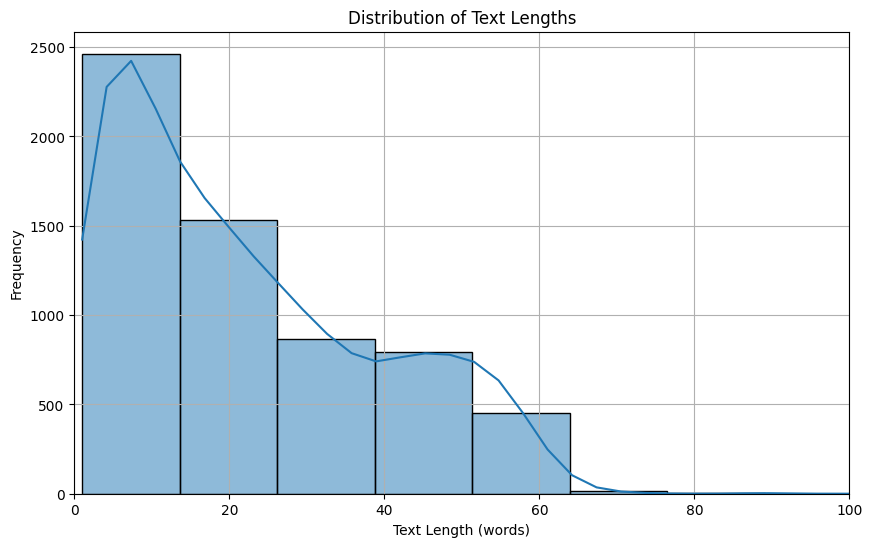

In [14]:
train_df['text_length'] = train_df['text'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 6))
sns.histplot(train_df['text_length'], bins=50, kde=True)
plt.title('Distribution of Text Lengths')
plt.xlabel('Text Length (words)')
plt.ylabel('Frequency')
plt.xlim(0, 100)  # Zoom in to texts with length up to 100 words
plt.grid(True)
plt.show()

## remove null values and duplicates

In [15]:
print(train_df.isnull().sum())
print(train_df.duplicated().sum())

index = train_df[train_df.duplicated() == True].index
train_df.drop(index, axis = 0, inplace = True)
train_df.reset_index(inplace=True, drop = True)
print(train_df.shape)

text           0
label          0
text_length    0
dtype: int64
37
(6088, 3)


In [16]:
index = train_df[train_df['text'].duplicated() == True].index
train_df.drop(index, axis = 0, inplace = True)
train_df.reset_index(inplace=True, drop = True)
print(train_df.shape)

(6081, 3)


## cleaning the texts

In [17]:
import gdown
from hazm import stopwords_list

# url = 'https://drive.google.com/uc?id=1Q3JK4NVUC2t5QT63aDiVrCRBV225E_B3'
# output = 'postagger.model'
# gdown.download(url, output, quiet=False)

from hazm import POSTagger
pos_tagger = POSTagger(model='postagger.model')

In [18]:
stopwords = set(stopwords_list())

def avg_word_length(text):
    words = text.split()
    if len(words) == 0:
        return 0
    return sum(len(w) for w in words) / len(words)

def count_punctuations(text):
    return len(re.findall(r'[^\w\s]', text))

def count_stopwords(text):
    return sum(1 for word in text.split() if word in stopwords)

def contains_url(text):
    return bool(re.search(r'https?://\S+|www\.\S+', text))

def pos_counts(text_tokens):
    tags = pos_tagger.tag(text_tokens)
    counts = {'NOUN': 0, 'VERB': 0, 'ADJ': 0}
    for _, tag in tags:
        if tag in counts:
            counts[tag] += 1
    return counts

In [19]:
normalizer = hazm.Normalizer()

In [20]:
train_df['text'] = train_df['text'].apply(normalizer.decrease_repeated_chars)

In [21]:
train_df['text'] = train_df['text'].apply(normalizer.persian_number)

In [22]:
train_df['text'] = train_df['text'].apply(normalizer.remove_diacritics)

In [23]:
train_df['text'] = train_df['text'].apply(normalizer.correct_spacing)

In [24]:
train_df['text'] = train_df['text'].apply(normalizer.normalize)

In [25]:
train_df['num_words'] = train_df['text'].apply(lambda x: len(x.split()))
train_df['num_chars'] = train_df['text'].apply(len)
train_df['avg_word_len'] = train_df['text'].apply(avg_word_length)
train_df['num_punctuations'] = train_df['text'].apply(count_punctuations)
train_df['stopword_ratio'] = train_df['text'].apply(count_stopwords) / (train_df['num_words'] + 1e-6)
train_df['has_url'] = train_df['text'].apply(contains_url).astype(int)

In [26]:
def remove_chars(text):
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,،-./:;<=>؟?@[\]^_`{|}~"""), ' ', text)
    text = text.replace('؛', '')
    text = re.sub('\s+', ' ', text)  # remove extra whitespace
    return text.strip()

train_df['text'] = train_df['text'].apply(remove_chars)

In [27]:
def Removing_urls_http(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)
train_df['text'] = train_df['text'].apply(Removing_urls_http)

## Feature engineering

In [28]:
le = preprocessing.LabelEncoder()
encoded_labels = le.fit_transform(train_df['label'])
train_df['label_decoded'] = encoded_labels

In [29]:
tokenizer = hazm.WordTokenizer()
train_df['text'] = train_df['text'].apply(tokenizer.tokenize)

In [30]:
def remove_stopwords(text):
    return [word for word in text if word not in stopwords]

train_df['text'] = train_df['text'].apply(remove_stopwords)

In [31]:
lemmatizer = hazm.Lemmatizer()

def safe_lemmatize_tokens(tokens):
    lemmatized = []
    for token in tokens:
        try:
            lemma = lemmatizer.lemmatize(token)
            lemmatized.append(lemma)
        except Exception as e:
            print(f"Error lemmatizing token: {token} — {e}")
            # lemmatized.append(token)  # fallback to the original token
    return lemmatized

train_df['text'] = train_df['text'].apply(safe_lemmatize_tokens)

In [32]:
def embed2string(list):
    return ' '.join(word for word in list)

In [33]:
train_df['text'] = train_df['text'].apply(normalizer.token_spacing)

In [34]:
train_df['text'] = train_df['text'].apply(embed2string)

In [35]:
train_df['text'] = train_df['text'].apply(remove_chars)

In [36]:
train_df['text'] = train_df['text'].apply(tokenizer.tokenize)

In [37]:
pos_features = train_df['text'].apply(pos_counts).apply(pd.Series)
train_df['num_nouns'] = pos_features['NOUN']
train_df['num_verbs'] = pos_features['VERB']
train_df['num_adjs'] = pos_features['ADJ']
train_df.head()

,text,label,text_length,num_words,num_chars,avg_word_len,num_punctuations,stopword_ratio,has_url,label_decoded,num_nouns,num_verbs,num_adjs
0,"[کوچیک, هستن, سایزشون, بدرد, نمیخوره, میخوام, ...",SAD,10,10,52,4.300000,0,0.300000,0,5,3,1,1
1,"[صدای, پرنده, دم, دما, صبح, متنفر, متنفر, متنفر]",HATE,9,9,46,4.222222,0,0.111111,0,3,2,0,2
2,"[کیفیت, خوبه, شک, خرید, خر, واقعا, راض, ۲, ماه...",SAD,42,44,228,4.204545,6,0.340909,0,5,8,4,3
3,"[همش, دوربین, ثبت‌شده, ایا, میشه, اعتراض, زد, ...",OTHER,23,21,110,4.285714,5,0.238095,0,4,7,4,1
4,"[وضع, ب, طرز, خنده, داشت, دار, گریه, داره, …]",SAD,9,9,35,3.000000,1,0.111111,0,5,4,2,0


#### word2vec

In [38]:
from huggingface_hub import hf_hub_download

# Download the file to a local path
model_path = hf_hub_download(
    repo_id="taesiri/PersianWordVecs",
    filename="farsi-dedup-cbow.bin"
)
import fasttext
model = fasttext.load_model(model_path)

In [39]:
def get_sentence_embedding(sentence, model):
    words = sentence
    word_vectors = [model.get_word_vector(word) for word in words if word.strip()]
    if not word_vectors:
        return np.zeros(model.get_dimension())  # fallback for empty input
    return np.mean(word_vectors, axis=0)

In [40]:
# --- Step 1: Generate sentence embeddings (X_train) ---
X_train = np.vstack(train_df['text'].apply(lambda x: get_sentence_embedding(x, model)).values)

# --- Step 2: Prepare target array (y_train) ---
y_train = train_df['label_decoded'].values

# --- Step 3: Drop unused label column ---
train_df.drop(['label','text','label_decoded'], axis=1, inplace=True)

# --- Step 5: Convert embedding array to DataFrame ---
X_embed_df = pd.DataFrame(X_train, columns=[f'emb_{i}' for i in range(X_train.shape[1])])

# --- Step 6: Reset indices to align DataFrames ---
train_df.reset_index(drop=True, inplace=True)
X_embed_df.reset_index(drop=True, inplace=True)

# --- Step 7: Concatenate handcrafted and embedding features ---
X_full_train = pd.concat([train_df, X_embed_df], axis=1)
X_full_train.head()

,text_length,num_words,num_chars,avg_word_len,num_punctuations,stopword_ratio,has_url,num_nouns,num_verbs,num_adjs,...,emb_90,emb_91,emb_92,emb_93,emb_94,emb_95,emb_96,emb_97,emb_98,emb_99
0,10,10,52,4.300000,0,0.300000,0,3,1,1,...,3.069255,0.594046,0.913686,0.397640,0.066729,2.097076,1.072160,2.826164,0.035439,0.625251
1,9,9,46,4.222222,0,0.111111,0,2,0,2,...,3.422472,1.126513,1.661175,-0.356889,1.644600,1.177424,2.583529,1.240094,-0.581717,2.451908
2,42,44,228,4.204545,6,0.340909,0,8,4,3,...,1.925532,0.393843,1.117555,-0.865416,-0.469156,0.300399,3.348664,1.377806,-1.857499,0.574810
3,23,21,110,4.285714,5,0.238095,0,7,4,1,...,5.706762,0.812042,1.766738,-0.149493,1.815374,1.749229,2.261634,2.163659,-0.769169,0.312723
4,9,9,35,3.000000,1,0.111111,0,4,2,0,...,4.794262,0.773505,2.332583,-3.015452,1.603654,2.958122,2.087815,2.155635,0.738917,3.711456


In [41]:
from sklearn.model_selection import train_test_split

# --- Step 8: Train-test split ---
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_full_train, y_train, test_size=0.2, random_state=42, stratify=y_train
)

print(f"Train shape: {X_train_split.shape}, Validation shape: {X_val_split.shape}")


Train shape: (4864, 110), Validation shape: (1217, 110)


In [42]:
import torch
import torch.nn as nn
from torch.utils.data import TensorDataset, DataLoader

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Convert DataFrames and arrays to tensors
train_dataset = TensorDataset(
    torch.tensor(X_train_split.values, dtype=torch.float32),
    torch.tensor(y_train_split, dtype=torch.long)
)

val_dataset = TensorDataset(
    torch.tensor(X_val_split.values, dtype=torch.float32),
    torch.tensor(y_val_split, dtype=torch.long)
)


train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True, drop_last=True)
val_loader = DataLoader(val_dataset, batch_size=128, drop_last=False)

In [43]:
# import sys
# !{sys.executable} -m pip install torch


In [44]:
class FixedResidualMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_classes):
        super().__init__()

        # Initial projection to hidden space
        self.input_proj = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.BatchNorm1d(hidden_dim),
            nn.ReLU()
        )

        # Residual blocks with proper identity mapping
        self.res_blocks = nn.ModuleList([
            ResidualBlock(hidden_dim),
            ResidualBlock(hidden_dim)
        ])

        # Classifier head
        self.classifier = nn.Linear(hidden_dim, num_classes)

        # Proper initialization
        self._initialize_weights()

    def _initialize_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.kaiming_normal_(m.weight, mode='fan_in', nonlinearity='relu')
                if m.bias is not None:
                    nn.init.constant_(m.bias, 0)
            elif isinstance(m, nn.BatchNorm1d):
                nn.init.constant_(m.weight, 1)
                nn.init.constant_(m.bias, 0)

    def forward(self, x):
        x = self.input_proj(x)

        # Apply residual blocks
        for block in self.res_blocks:
            x = block(x)

        return self.classifier(x)


class ResidualBlock(nn.Module):
    def __init__(self, dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
            nn.ReLU(),
            nn.Dropout(0.1),

            nn.Linear(dim, dim),
            nn.BatchNorm1d(dim),
            nn.ReLU(),
            nn.Dropout(0.1)
        )
        # No need for projection - same dimension
        self.shortcut = nn.Identity()

    def forward(self, x):
        residual = self.shortcut(x)
        out = self.net(x)
        return out + residual  # Clean residual connection

In [45]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights = torch.tensor(class_weights, dtype=torch.float32).to(device)

criterion = nn.CrossEntropyLoss(weight=class_weights)

In [ ]:
# For training
X_train_np = train_dataset.tensors[0].cpu().numpy()  # features
y_train_np = train_dataset.tensors[1].cpu().numpy()  # labels

# For validation
X_val_np = val_dataset.tensors[0].cpu().numpy()
y_val_np = val_dataset.tensors[1].cpu().numpy()


: 

In [ ]:
import numpy as np
import xgboost as xgb
from sklearn.metrics import f1_score

# Simplify model
model_xgb = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=len(np.unique(y_train_np)),
    use_label_encoder=False,
    random_state=42,
    n_estimators=50,
    max_depth=4,
    learning_rate=0.1,
    eval_metric='mlogloss'
)

model_xgb.fit(X_train_np[:10000], y_train_np[:10000])

y_pred = model_xgb.predict(X_val_np[:1000])
f1 = f1_score(y_val_np[:1000], y_pred, average='macro')
print(f"XGB Validation F1 Score: {f1:.4f}")


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train_np, y_train_np)
y_pred = rf.predict(X_val_np)
f1 = f1_score(y_val_np, y_pred, average='macro')
print(f"Random Forest Validation F1 Score: {f1:.4f}")


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

X_train_np = train_dataset.tensors[0].cpu().numpy()
y_train_np = train_dataset.tensors[1].cpu().numpy()
X_val_np = val_dataset.tensors[0].cpu().numpy()
y_val_np = val_dataset.tensors[1].cpu().numpy()

model_lr = LogisticRegression(max_iter=1000, random_state=42)
model_lr.fit(X_train_np, y_train_np)

y_pred = model_lr.predict(X_val_np)
f1 = f1_score(y_val_np, y_pred, average='macro')
print(f"Logistic Regression Validation F1 Score: {f1:.4f}")

In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score

X_train_np = train_dataset.tensors[0].cpu().numpy()
y_train_np = train_dataset.tensors[1].cpu().numpy()
X_val_np = val_dataset.tensors[0].cpu().numpy()
y_val_np = val_dataset.tensors[1].cpu().numpy()

model_svm = SVC(kernel='rbf', probability=True, random_state=42)
model_svm.fit(X_train_np, y_train_np)

y_pred = model_svm.predict(X_val_np)
f1 = f1_score(y_val_np, y_pred, average='macro')
print(f"SVM Validation F1 Score: {f1:.4f}")

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score

X_train_np = train_dataset.tensors[0].cpu().numpy()
y_train_np = train_dataset.tensors[1].cpu().numpy()
X_val_np = val_dataset.tensors[0].cpu().numpy()
y_val_np = val_dataset.tensors[1].cpu().numpy()

model_gb = GradientBoostingClassifier(n_estimators=100, random_state=42)
model_gb.fit(X_train_np, y_train_np)

y_pred = model_gb.predict(X_val_np)
f1 = f1_score(y_val_np, y_pred, average='macro')
print(f"Gradient Boosting Validation F1 Score: {f1:.4f}")


#### TF IDF

In [ ]:
vectorizer = TfidfVectorizer()
vector = vectorizer.fit_transform(train_x['text'])
train_x = pd.DataFrame(vector.toarray(), columns=vectorizer.get_feature_names_out(), index=train_x.index)

In [ ]:
[train_x.shape,train_y.shape]

In [ ]:
test_df['text'] = test_df['text'].apply(normalizer.decrease_repeated_chars)
test_df['text'] = test_df['text'].apply(normalizer.persian_number)
test_df['text'] = test_df['text'].apply(normalizer.remove_diacritics)
test_df['text'] = test_df['text'].apply(normalizer.correct_spacing)
test_df['text'] = test_df['text'].apply(normalizer.normalize)
test_df['text'] = test_df['text'].apply(remove_stopwords)
test_df['text'] = test_df['text'].apply(remove_chars)
test_df['text'] = test_df['text'].apply(Removing_urls_http)
test_df['text'] = test_df['text'].apply(lemmatizer.lemmatize)

In [ ]:
test_df['text'] = test_df['text'].apply(tokenizer.tokenize)
test_df['text'] = test_df['text'].apply(normalizer.token_spacing)
test_df['text'] = test_df['text'].apply(embed2string)

encoded_labels = le.transform(test_df['label'])
test_df['label_decoded'] = encoded_labels

In [ ]:
test_x = test_df.drop('label_decoded', axis=1)
test_y = test_df['label_decoded']

In [ ]:
vector2 = vectorizer.transform(test_x['text'])
test_x = pd.DataFrame(vector2.toarray(), columns=vectorizer.get_feature_names_out(), index=test_x.index)

## training

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,ExtraTreesClassifier,HistGradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,VotingClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(train_x)
pca = PCA(n_components=2000)
train_x = pca.fit_transform(X_scaled)

X_scaled2 = scaler.transform(test_x)
test_x = pca.transform(X_scaled2)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score

def evaluate(model,Xtrain,Ytrain,Xtest,Ytest):
    # Assume y_test are the true labels and y_pred are the predicted labels
    model.fit(Xtrain,Ytrain)
    y_train_pred = model.predict(Xtrain)
    y_test_pred = model.predict(Xtest)

    print("train report")
    accuracy_train = accuracy_score(Ytrain, y_train_pred)
    print(f"Accuracy: {accuracy_train}")
    weighted_f1_train = f1_score(Ytrain, y_train_pred, average='weighted')
    print(f'Weighted-average F1 Score: {weighted_f1_train}')

    # Confusion Matrix
    cm = confusion_matrix(Ytrain, y_train_pred)
    plt.figure(figsize=(5, 4)) # Set the figure size
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_) # Create a heatmap from the confusion matrix
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

    # Precision, Recall, F1-score
    report = classification_report(Ytrain, y_train_pred, output_dict=True)
    colors = ['#ffdfdf', '#dfffff', '#dfffdf', '#dfdfff', '#ffdfff', '#ffffdf']  # Adjust colors as needed

    # Prepare data for plotting
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Populate data with class-specific metrics
    for cls, metrics_values in report.items():
      if cls.isdigit():
          labels.append(le.classes_[int(cls)])
          for metric in metrics:
              data[metric].append(metrics_values.get(metric, None))
      elif cls in ['macro avg', 'weighted avg']:
          labels.append(cls)
          for metric in metrics:
              data[metric].append(metrics_values.get(metric, None))


    # Convert data to DataFrame
    df3 = pd.DataFrame(data, index=labels)

    # Create subplots for each metric
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=True)
    for ax, metric in zip(axes, metrics):
        sns.barplot(hue=df3.index, y=metric, data=df3, ax=ax, legend=False)
        ax.set_title(f'{metric.capitalize()} by Class')
        ax.set_ylim(0, 1.1)

    plt.suptitle(f'classification report for {model.__class__.__name__} ', fontsize=16)
    plt.tight_layout()
    plt.show()

    print("\n\n\ntest report")
    accuracy_test = accuracy_score(Ytest, y_test_pred)
    print(f"Accuracy: {accuracy_test}")
    weighted_f1_test = f1_score(Ytest, y_test_pred, average='weighted')
    print(f'Weighted-average F1 Score: {weighted_f1_test}')

    # Confusion Matrix
    cm = confusion_matrix(Ytest, y_test_pred)

    plt.figure(figsize=(5, 4)) # Set the figure size
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=le.classes_, yticklabels=le.classes_) # Create a heatmap from the confusion matrix
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()
    # Precision, Recall, F1-score
    report = classification_report(Ytrain, y_train_pred, output_dict=True)

    colors = ['#ffdfdf', '#dfffff', '#dfffdf', '#dfdfff', '#ffdfff', '#ffffdf']  # Adjust colors as needed

    # Prepare data for plotting
    metrics = ['precision', 'recall', 'f1-score', 'support']
    data = {metric: [] for metric in metrics}
    labels = []

    # Populate data with class-specific metrics
    for cls, metrics_values in report.items():
      if cls.isdigit():
          labels.append(le.classes_[int(cls)])
          for metric in metrics:
              data[metric].append(metrics_values.get(metric, None))
      elif cls in ['macro avg', 'weighted avg']:
          labels.append(cls)
          for metric in metrics:
              data[metric].append(metrics_values.get(metric, None))


    # Convert data to DataFrame
    df3 = pd.DataFrame(data, index=labels)

    # Create subplots for each metric
    fig, axes = plt.subplots(1, len(metrics), figsize=(20, 6), sharey=True)
    for ax, metric in zip(axes, metrics):
        sns.barplot(hue=df3.index, y=metric, data=df3, ax=ax, legend=False)
        ax.set_title(f'{metric.capitalize()} by Class')
        ax.set_ylim(0, 1.1)

    plt.suptitle(f'classification report for {model.__class__.__name__} ', fontsize=16)
    plt.tight_layout()
    plt.show()

    return {"model": model.__class__.__name__, "f1 train": weighted_f1_train, "accuracy train": weighted_f1_train, "f1 test": weighted_f1_test, "accuracy test": weighted_f1_test}

In [ ]:
model = LogisticRegression(random_state=42, solver='saga')
evaluate(model,train_x,train_y,test_x,test_y)

In [ ]:
model = svm.SVC(C= 1, kernel='rbf')
evaluate(model,train_x,train_y,test_x,test_y)